### Practice with Scale Free Networks

A scale-free network is one whose degree distribution follows a power law. Recall that a power law is any function of the form $x^\alpha$. Let $p$ be the distribution of the degrees in a network. 

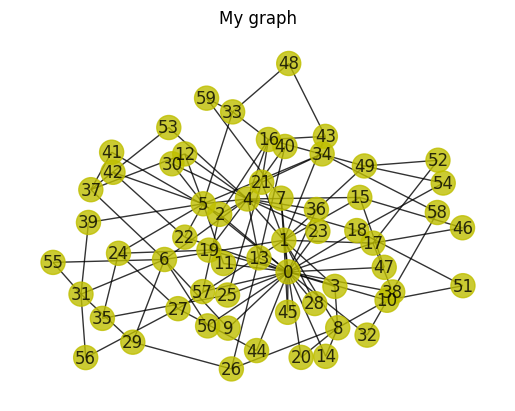

In [51]:
from network_utilities import show_graph
from network_utilities import show_degree_distribution
import networkx as nx

num_vertices: int = 60
num_new_edges: int = 2
G: nx.Graph = nx.barabasi_albert_graph(num_vertices, num_new_edges, seed=42)
show_graph(G)

Look at the degree distribution.

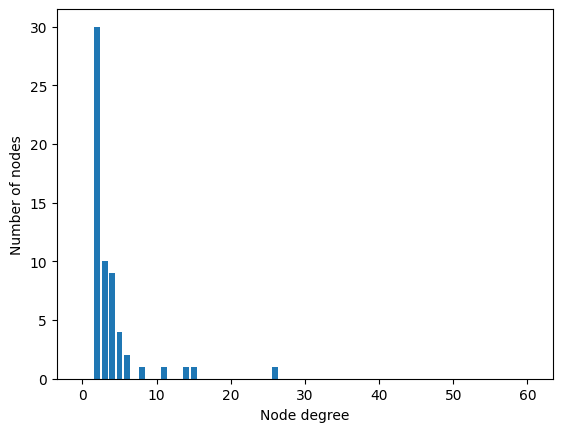

In [52]:
show_degree_distribution(G)

We can't do the _straight line test_ on this distribution because it isn't plotted on a log-log scale. We'll need a new plotting routine.

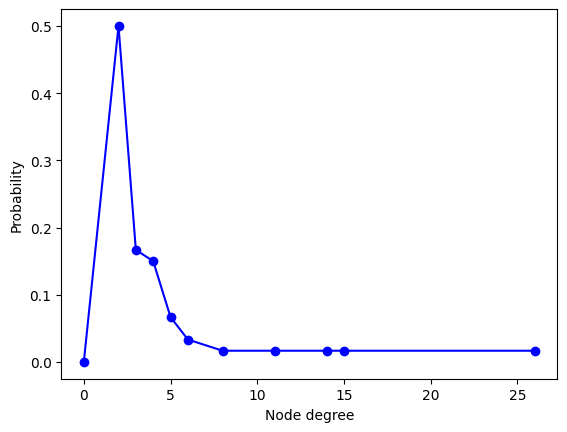

In [53]:
from network_utilities import get_degree_count_dictionary
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def show_degree_density(G: nx.Graph, plotting_method: Callable = plt.plot) -> None:
    degree_pairs: dict[int,int] = sorted(get_degree_count_dictionary(G).items())
    x = [degree for degree, _ in degree_pairs]
    y = [count for _, count in degree_pairs]
    if 0 not in x:
        x.insert(0,0)
        y.insert(0,0)
    y = y / np.sum(y)
    #plt.loglog(x,y)
    plotting_method(x,y,'b-o')
    plt.xlabel('Node degree')
    plt.ylabel('Probability')

show_degree_density(G)


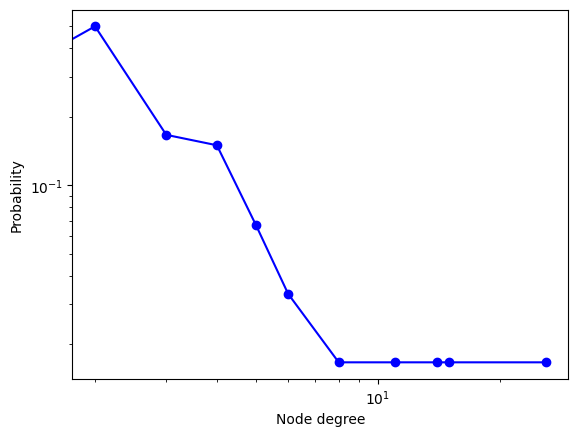

In [54]:
show_degree_density(G, plotting_method = plt.loglog)

---

### Barabasi Albert Algorithm

Let's start implementing the Barabasi Albert algorithm. 

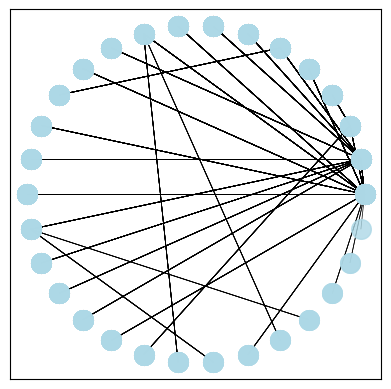

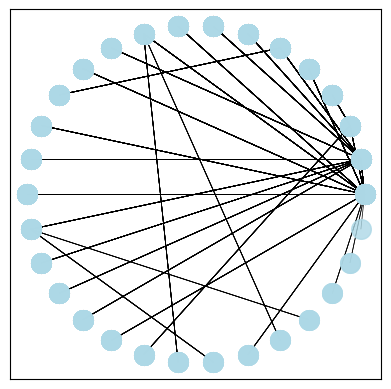

In [23]:
%matplotlib inline
from network_utilities import adjacency_matrix_to_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Tuple
from IPython import display
import itertools

## Code for updating a Jupyter notebook plot in realtime
## is from google AI overview from prompt
## "jupyter notebook update plot in loop"

## All code assumes nodes are consecutive integers from 0 to some max number

desired_num_vertices: int = 30

def _get_initial_positions(desired_num_vertices: int) -> Tuple[nx.Graph, dict[int, tuple[float, float]]]:
    # Put all the vertices around a circle
    A: np.array = np.zeros((desired_num_vertices,desired_num_vertices))
    G = adjacency_matrix_to_graph(A)
    pos = nx.circular_layout(G)
    return G, pos

def _configure_plot(pos: dict[int, tuple[float,float]]) -> None:
    ax = plt.gca()
    x_positions: list[float] = [x for x,_ in pos.values()]
    y_positions: list[float] = [y for _,y in pos.values()]
    ax.set_xlim(min(x_positions)-.1, max(x_positions)+.1)
    ax.set_ylim(min(y_positions)-.1, max(y_positions)+.1)
    ax.set_aspect('equal')

def _update_plot(G: nx.Graph, 
                 pos: dict[int, tuple[float, float]], 
                 vertex_set: set[int], 
                 edge_set: set[tuple[int,int]]) -> None:
    desired_node_size = 200
    G.add_edges_from(edge_set)
    nx.draw_networkx_nodes(G, pos, 
                        nodelist = list(vertex_set),
                        node_color=['lightblue'],
                        node_size=desired_node_size,
                        alpha=0.8)
    nx.draw_networkx_edges(G,pos,edgelist=list(edge_set),width=0.5)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)

def _add_edges(vertex_set: set[int], 
               new_vertex: int, 
               G: nx.Graph,
               required_edges: int = 1) -> set[tuple[int,int]]:
    new_edges: set[tuple[int,int]] = set()
    degree_dict: dict[int,int] = {vertex: G.degree(vertex) for vertex in vertex_set}
    total_degree: float = float(sum(degree_dict.values()))
    vertex_list = list(vertex_set)
    while len(new_edges) < required_edges:
        np.random.shuffle(list(vertex_list))
        for vertex in vertex_list:
            prob: float = G.degree(vertex)/ total_degree
            if np.random.uniform() < prob:
                new_edges.add((new_vertex, vertex))
            if len(new_edges) == required_edges:
                break
    return new_edges
G, pos = _get_initial_positions(desired_num_vertices)
_configure_plot(pos)

# m0 in the wikipedia article on Barabasi Albert network
vertex_set: set[int] = {0,1}
edge_set: set[tuple[int,int]] = {(0,1)}
degree_dict: dict[int,int] = {0:1, 1:1}

while len(vertex_set) <= desired_num_vertices:
    _update_plot(G, pos, vertex_set, edge_set)
    new_vertex = len(vertex_set)
    new_edges = _add_edges(vertex_set, new_vertex, G, required_edges=2)
    vertex_set.add(new_vertex)
    edge_set.update(new_edges)